# Diagnóstico preliminar de cardiopatías mediante el índice de variabilidad de frecuencia cardíaca obtenido mediante el análisis frecuencial de Fourier sobre una señal de ECG. 

**Elaborado por: Camacho López Rubén Eequiel// Flores Luna Luis Eduardo // Pozos Castillos Vincent Tristán**

## Resumen: 
Se establece una conexión entre Arduino y Python con el objetivo de aplicar la transformada rápida de Fourier a una señal discreta con el objetivo de llevar a cabo su análisis en el dominio frecuencial. La señal sometida a este estudio provino de un ECG, de modo que se pudo estimar la frecuencia cardiaca y la variación de la frecuencia cardíaca (VFC). Se calcularon varios parámetros temporales y frecuenciales relacionados con la VFC que son de importancia en el diagnóstico de cardiopatías y en la evaluación del papel del Sistema Nervioso Autónomo. 

## Motivación: 

En la época actual resulta un poco intuitivo que el análisis de datos que proporcionan los sistemas digitales es más rápido que el que podemos realizar mediante medios analógicos. Por ello, la introducción a un lenguaje de programación es fundamental, "transformando así la postura ante la resolución de alguna problemática". 

La motivación de este proyecto está relacionada con el diagnóstico de anomalías en la actividad cardiaca, patologías como diabetes mellitus y síndrome de fatiga crónica, además de la valoración del funcionamiento del SNA, para ello se calcula la variabilidad de la frecuencia cardiaca, índice del cual se derivan parámetros necesarios para una evaluación no invasiva, contribuyendo así en un diagnóstico oportuno. 

## Estructura general del trabajo. 

A lo largo del trabajo se presenta:

**1.Concepto de Frecuencia Cardíaca e Índice de Variabilidad Cardíaca**

**2.Conceptos previos al tratamiento de Fourier, Transformada de Fourier, Transformada Discreta de Fourier, Transformada Rápida de Fourier**

**3.Conexión Arduino-Python**

**4.Filtrado de señal de ECG, Reconocimiento de los picos R, Estimación de los intervalos RR**

**5.Tacograma, Estimación de parámetros temporales y frecuenciales relacionados a VFC**


## Frecuencia cardiaca e Índice de variabilidad de frecuencia cardíaca.

### Frecuencia cardíaca

El corazón se encarga de bombear la sangre a través del sistema circulatorio hacia los distintos tejidos presentes en el cuerpo, con el objetivo de dotarlos de nutrimentos y $O_{2}$, a la par que se recolectan desechos y $CO_{2}$. El proceso de contracción cardíaca se conoce como ciclo cardiaco e involucra las siguientes fases: 

#### Ciclo cardíaco

1. Surge un potencial de acción en el Nodo Sinoatrial (SA) por efecto de las células marcapasos. 
2. El impulso se transmite a lo largo del circuito atrial a través del Has de Bachmann, de modo que se genera la contracción de esta cavidad. El impulso se transmite en la región atrial hasta llegar al Nodo Atrioventricular (AV). 
3. El impulso atraviesa el Nodo Atrioventricular y se distribuye por el Has de His. 
4. El impulso se transmite a través de toda la camara ventrícular gracias a las fibras de Purkinje, lo que genera la contracción en esta cavidad, y la posterior expulsión sanguínea. 

Los impulsos y potenciales de acción anteriormente mencionados son impulsos eléctricos. De modo que pueden ser detectados (con ayuda de electrodos) y representados en términos del tiempo y su voltaje elétrico asociado: este es el trabajo de la electrocardiografía. 

Las señales provenientes de un electromiograma, o mejor conocidas como señales ECG, representan la actividad eléctrica relacionada con el ciclo cardíaco, de modo que en una señal típica de ECG se pueden distinguir las distintas etapas del ciclo cardíaco relacionándolas con los diferentes tipos de ondas que conforman una señal de ECG: Onda P, Complejo QRS, Onda T. 

El complejo QRS está relacionado con la contracción de la camara ventrícular y la posterior expulsión de sangre, además de que es la parte de la señal de ECG que presenta una mayor amplitud (mayor voltaje), por ello, si queremos conocer el tiempo entre dos contracciones ventrículares (dos expulsiones de sangre) basta con reconocer los puntos R entre dos señales asociadas a ciclos cardíacos consecutivos. 

La frecuencia cardiaca representa la cantidad de contracciones cardíacas que se dan durante un minuto. La frecuencia cardíaca normal oscila entre 50 y 100 pulsaciones por minuto, aunque condiciones como el ejercicio alteran el valor de frecuencia cardíaca. Se calcula a partir del conocimiento del periodo cardíaco (Intervalo de tiempo entre dos ondas R consecutivas, intervalo R-R)


### Variabilidad de frecuencia cardíaca.

Sin embargo,  el periodo cardíaco, o intervalo R-R, varía entre contracciones cardiacas sucesivas. Puede ser que el intervalo R-R entre la primer contracción y la segunda tenga un valor de 859ms, mientras que el intervalo R-R relacionado entre la segunda y la tercera contracción tiene un valor de 793ms, de modo que podemos obtener frecuencias cardiacas diferentes en esos dos intervalos: 70 pulsaciones por minuto y 76 pulsaciones por minuto. 

**La variabilidad de frecuencia cardiaca mide justamente la variación de la duración de los intervalos R-R, y nos permite vislumbrar la diferencia entre las frecuencias correspondiente a un intervalo con respecto a la frecuencia cardiaca media.** 

Normalmente la variabilidad de frecuencia cardíaca representa la relación existente entre el Sistema Nervioso Autónomo (Sistema Nervioso Simpático (SNS) y Parasimpático (SNP)) y el Sistema Cardiovascular.

Donde el SNP puede disminuir la frecuencia cardiaca auxiliandose con impulsos eléctricos de alta frecuencia, mientras que el SNP aumenta la frecuencia cardiaca por medio de impulsos eléctricos de baja frecuencia. La frecuencia cardíaca, la carga de trabajo necesaria realizar alguna acción, y la variabilidad de  frecuencia cardiaca se relacionan de forma inversamente proporcional, es decir, mientras más esfuerzo se realiza, la frecuencia cardíaca aumenta y la variabilidad de frecuencia cardíaca disminuye. 

**La variabilidad de frecuencia cardíaca está sujeta a la acción de varios factores, por ejemplo:**

Sistema Nervioso Central: Emociones, procesos mentales, estrés.

Sistema Respiratorio

Factores que afectan a la Frecuencia cardíaca por si misma: edad, género, posición del cuerpo, hora del día, ingesta de alcohol, tabaco, medicaciones. 

El análisis de la variabilidad de frecuencia cardíaca nos puede brindar información con respecto al pronóstico, patogénesis y tratamiento de enfermedades relacionadas a patologías cardiovasculares, diabetes mellius, sindrome de fatiga crónica; así como información relacionada con la adaptación al estrés, y al esfuerzo físico.

#### Obtención de la VFC.

Se emplea un registro de ECG con duración de 24 horas (**Registro Holter**) durante el cual una persona realiza sus actividades cotidianas, se usa con el fin de cuantificar el riesgo de una persona a padecer alguna enfermedad como diabetes mellitus, sindrome de fática crónica, etc. En ocasiones, si se busca valorar la adaptación al esfuerzo físico se emplean aparatos portátiles para registrar la señal de ECG aún en condiciones de ejercicio. Empleando métodos computacionales se calcula la duración de cada intervalo RR correspondiente a la respectiva contracción. 

#### Tacogramas

La manera más sencilla de representar la VFC es graficar la magnitud de los intervalos R-R (en milisegundos) en el eje vertical, mientras que en el eje horizontal representamos el tiempo transcurrido.

#### Parámetros temporales y frecuenciales relacionados a VFC.

Los parámetros que se presentan a continuación no se pueden relacionar de  una manera sencilla con las diferentes cardiopatías y patologías como diabetes mellitus, sindrome de fatiga crónica, de forma que nos permita hacer un diagnóstico directo y conciso, sin embargo, para especialistas pueden brindar información relevante. 

#### Parámetros temporales:

**RRSD**: Es la desviación estandar de los valores de los intervalos R-R, y se conoce como **Variabilidad Total**

**RMSSD**: Calculamos la diferencia entre dos intervalos RR consecutivos, se eleva al cuadrado y se calcula la raíz cuadrada del valor medio de su suma. Al realizar la diferencia entre intervalos consecutivos sirve como un indicador de las variaciones en periodos cortos. Recordando que el SNP actúa de manera rápida disminuyendo la FC, a diferencia del SNS que tarda cerca de 20-30 contracciones en modificar la FC, **podemos asociar al RMSSD con la actividad del SNP**.

Existen otros parámetros temporales, pero en realidad es muy difícil asociar alguno de sus valores con la actividad del sistema SNP o SNS, sabemos que ayudan a cuantificar la acción del Sistema Nervioso Autónomo, pero analizar esa relación no es uno de los propositos de este trabajo. 
Se sugiere además que estos parámetros pueden ayudar a clasificar el riesgo de morbi-mortalidad, especialmente en casos cardiovasculares. 

#### Parámetros frecuenciales

El análisis frecuencial necesario para calcular este tipo de parámetros normalmente se hace con ayuda de la Transformada de Fourier, y se realiza en señales ECG con 5 minutos de duración. 
La señal de VFC que representamos mediante el tacograma puede descomponer su potencia en varias frecuenciales, las cuales se encuentran en el rango de 0 a 0,4Hz, y se relacionan con algún aspecto del Sistema Nervioso Autónomo. 

Las frecuencias **ULF : inferiores a 0,003Hz** se conocen como frecuencias ultra bajas, las cuales son más visibles mientras mayor es la duración de la señal de ECG. 

Las frecuencias **VLF:0.003Hz-0.04Hz** se conocen como frecuencias muy bajas y se relacionan con el efecto de hormonas, así como las influencias vaso-motoras y termoreguladoras y del sistema renina-angiotensina-aldosterona.

Las frecuencias **LF:0.04Hz-0.15Hz** se conocen como frecuencias bajas y se relacionan con la actividad del SNA (en especial la del SNS), además de la actividad baroreceptora. 

Las frecuencias **HF:0.15Hz-0.4Hz** se conocen como altas frecuencias y están relacionadas con la actividad del SNS. 

La frecuencia respiratoria tiene un papel importante al relacionar las frecuencias con el papel de ciertos sistemas corporales, por ejemplo, con bajas frecuencias respiratorias podemos asociar el efecto del SNP en las frecuencias bajas  


## Conceptos previos para comprender mejor la transformada de Fourier.

#### Series numéricas.
Cuando se nos presenta una lista de números ordenada como por ejemplo: $1,3,5,7,9...$ o $\frac{1}{2},\frac{2}{3},\frac{3}{4},..$ nos es fácil deducir cuál es el término siguiente ya que estas secuencias obedecen una "ley de formación". Cuando describimos una sucesión numérica es importante asignar la ley de formación que la rige. Cada uno de los términos de la sucesión se caracteriza por un numéro natural *k* que indica su posición en la lista. Así, con ayuda de la ley de formación nos es sencillo determinar el valor del término que ocupa la posición enésima dentro de la sucesión. 

Por ejemplo, sea: 
$a_{k}=\frac{1}{k^{2}}$, la sucesión que representa es: $1,\frac{1}{4},\frac{1}{9},\frac{1}{16},...$

Sea una sucesión numérica infinita la cual contiene los elementos $a_{1}, a_{2}, a_{3}, a_{4},..., a_{k}, ... $ podemos emplear a estos términos para construir *sumas parciales*, las cuales son de la forma: 

$S_{1}=a_{1}$

$S_{2}=a_{1}+a_{2}$

$S_{3}=a_{1}+a_{2}+a_{3}$

$S_{k}= a_{1}+a_{2}+a_{3}+...+a_{k}$

A partir de esta idea de sumas parciales podemos definir, partiendo de una sucesión numérica con elementos $a_{1}, a_{2}, a_{3}, a_{4},..., a_{k}, ... $ a una **serie numérica** como: 

$S=lim_{k tiende a infinito}{S_{k}}= a_{1}+a_{2}+a_{3}+...=\sum_{k=1}^{infinito}a_{k}$

Apesar de que se trata de una suma no podemos calcularla término a término, ya que posee elementos infinitos, sin embargo podemos estimar el resultado por otros métodos. Podría parecer que la suma de elementos infinitos tiende necesariamente a ser un valor infinito, mas no siempre es así. 

Por ejemplo, de la sucesión: $\frac{1}{2},\frac{1}{4},\frac{1}{8},\frac{1}{16}$ podemos formar a las sumas parciales: 

$S_{1}=\frac{1}{2}$

$S_{2}=\frac{1}{2}+\frac{1}{4}=\frac{3}{4}$

$S_{3}=\frac{1}{2}+\frac{1}{4}+\frac{1}{8}=\frac{7}{8}$

De manera que la suma tienda a infinito, el valor de $S$ será igual a 1, decimos entonces que la serie numérica converge a 1. 
Sin embargo, no siempre es sencillo determinar un valor exacto al cual converge una serie, o si es que por lo menos converge (el caso contrario se conoce como que la serie diverge). Una condición necesaria para que una serie converja (no siempre suficiente) es la siguiente: 
"*Para que una serie numérica converja es necesario que su término general tienda a cero*". 
Esta condición basta para indicar que una serie diverge (si no se cumple), pero no siempre garantiza que una serie converja. 

Existen varios criterios que nos ayudan a discernir entre una serie numérica convergente y divergente, por ejemplo: 

**Criterio de Leibniz**

**Criterio de comparación**

**Criterio de la integral**

**Criterio del cociente**

#### Series de potencias.

En el caso de las series numéricas la ley de formación dependía únicamente de un valor: la posición del elemento en la sucesión. Las series de funciones son aquellas en las cuales los términos dependen de una o más variables. Por ejemplo:
$\sum_{k=0}^{infinito}\frac{x^{k}}{k+1}=1+\frac{x}{2}+\frac{x^{2}}{3}+\frac{x^{3}}{4}+...$. Nótese que al asignar valores distintos de X obtenemos varias series numéricas distintas. 
Sea $x=2$, entonces la serie numérica que se obtiene es: $1+\frac{2}{2}+\frac{4}{3}+\frac{8}{4}+...$
Claramente el comportamiento de la serie de potencias depende del valor X que le asignemos, por ejemplo, si en lugar de asignar $X=2$, asignamos el valor $X=-1$ obtenemos una serie alternada: $1-\frac{1}{2}+\frac{1}{3}-\frac{1}{4}+...$, una región de interés es el intervalo de valores de X que al ser sustituidos en la expresión de la serie de potencias generan series numéricas convergentes, esa región se conoce como intervalo de convergencia. 

En general, una serie de potencias de x es una expresión de la forma: 

$\sum_{k=0}^{infinito}c_{k}x_{k} = c_{0}+c_{1}x+c_{2}x^{2}+c_{3}x^{3}+...$ es decir, trabajamos con una serie de potencias positivas de x, observemos además que estos coeficientes $c_{k}$ deberán estar dados por una expresión general (ley de formación) que dependa de su posición en la serie (k), así como en el caso de las series numéricas. 

Esta serie de potencias tiene infinitos términos, sin embargo, si nos tomamos los primeros K+1 elementos, habremos contruido un polinomio de orden K. 

$P_{k}(x)=\sum_{k=0}^{K}c_{k}x_{k}=c_{0}+c_{1}x+c_{2}x^{2}+...+c_{k}x_{k}$

Ahora, así como una serie numérica converge a un valor numérico, la serie de potencias converge a una función, es decir, podemos aproximar una función mediante una serie de potencias pero esta aproximación solamente será válida dentro del intervalo de convergencia (de otro modo, no podemos asegurar la convergencia de la serie). Otro aspecto fundamental es que la aproximación aumenta conforme mayor sea el grado del polinomio generado por la serie de potencias

Por ejemplo, en los polinomios de Mac Laurin se requiere que la función f(x) que queremos aproximar sea continua, con derivadas continuas hasta orden *k*, y la aproximación es únicamente válida para valores cercanos a 0, además de que las derivadas de f(x) evaluadas en 0 sean iguales a las derivadas del polinomio evaluadas en 0. Algunas polinomios de Mac Laurin son: 

$e(x)=1+x+\frac{1}{2!}x^{2}+\frac{1}{3!}x^{3}+...+\frac{1}{n!}x^{n}+...$

$sen(x)=x-\frac{x_{3}}{3!}+\frac{x_{5}}{5!}-\frac{x_{7}}{7!}+...$

En el caso de los polinomios de Mac Laurin contamos con una base para generar la aproximación, se trata de las potencias positivas de x. En el caso de la Serie de Fourier, vamos a emplear como base para nuestra aproximació a las funciones seno y coseno armónicamente relacionadas. (pronto discutiremos el concepto de armónicamente relacionadas)

#### Series de Fourier

Una función es periódica cuando cumple $f(t)=f(t+T)$ donde T es el periodo de la función, las funciones trigonométricas poseen un periodo de $2\pi$, de modo que $cos(wT)=cos(w(t+T))=cos((wt)+wT)$ entonces $wT=2\pi$, de modo que definimos a esta cantidad w como la frecuencia de la función $w=\frac{2\pi}{T}$. 

Si consideramos una familia de funciones:

$f_{1}=cos(w_{0}t)$,  $f_{2}=cos(2w_{0}t)$,  $f_{3}=cos(3w_{0}t)$, ..., $f_{k}=cos(kw_{0}t)$, podemos observar que en la primera función, la frecuencia es $w_{0}$, mientras que en la segunda es $2w_{0}$, la tercera es $3w_{0}$, y así sucesivamente, de modo que podemos definir a $w_{0}$ como la frecuencia fundamental y sus múltiplos $kw_{0}$ se consideran sus armónicas, de modo que bajo esta relación podemos afirmar que la familia de funciones están relacionadas armónicamente. 

Vamos a emplear estas familias de funciones relacionadas armónicamente como la base para generar aproximaciones de funciones. Fue J.B. Fourier quien formuló: *cualquier función periódica se puede representar mediante series de senos y cosenos relacionadas armónicamente.* Por lo tanto, para una función f(t) con periodo T, considerando la base infinita de funciones $1,cos(w_{0}t),cos(2w_{0}t),...,sen(w_{0}t),sen(2w_{0}t),...,$ podemos aproximarla mediante un polinomio conocido como **serie trigonométrica de Fourier de  f(t)**:

$f(t)= \frac{a_{0}}{2} + a_{1}cos{w_{0}t}+a_{2}cos{2w_{0}t}+a_{3}cos{3w_{0}t}+a_{4}cos{4w_{0}t}+...+ b_{1}sen{w_{0}t}+b_{2}sen{2w_{0}t}+b_{3}sen{3w_{0}t}+b_{4}sen{4w_{0}t}+...$

$f(t)= \frac{a_{0}}{2} + \sum_{k=1}^{\infty}a_{k}cos(kw_{0}t)+b_{k}sen({kw_{0}t})$

donde los coeficientes $a_{k}$ y $b_{k}$ representa los coeficientes de Fourier, y nos dicen qué tanto aporta cada frecuencia $kw_{0}$ en el desarrollo de la función $f(t)$. Por analogía podemos pensar que cualquier función se puede aproximar usando los "mismos ingredientes", son los coeficientes de Fourier los que nos brindan la cantidad necesaria de cada uno. 

Los coeficientes de Fourier están determinados por:

$a_{k}=\frac{2}{T}\int_{0}^{T}f(t)cos(kw_{0}t)dt$

$b_{k}=\frac{2}{T}\int_{0}^{T}f(t)sin(kw_{0}t)dt$

Consideremos ahora un conjunto finito de series de senos y cosenos con la cual vamos a formar la aproximación a nuestra función:

$1,cos(w_{0}t),cos(2w_{0}t),cos(3w_{0}t),...,cos(Nw_{0}t), sin(w_{0}t),sin(2w_{0}t),sin(3w_{0}t),...,sin(Nw_{0}t)$

que al emplearla para generar nuestra serie de Fourier nos da:

$f(t)= \frac{a_{0}}{2} + \sum_{k=1}^{N}a_{k}cos(kw_{0}t)+b_{k}sen({kw_{0}t})$ donde N es un número cualquiera, no sé, quizá el número de muestras. 

#### ¿TEOREMA DE PARSEVAL?

Se puede evaluar qué tan buena es nuestra aproximación calculando el error cuadrático medio: 

$\delta_{N}^{2}=\int_{T}(f(t)-S_{N})^{2}dt$, se puede demostrar (pero no lo haremos aquí) que este error disminuye cuando aumenta el valor N (el cual recordamos, tal vez pueda ser el número de muestras *guiño, guiño*). 

#### Forma compleja de la serie de Fourier

Por comodidad, podemos expresar la serie de Fourier mediante una combinación lineal de senos y cosenos armonicamente relacionados o, empleando la relación de Euler, en su forma compleja.

La relación de Euler es: 

$e^{i\theta}=cos(\theta)+isin(\theta)$ de modo que:

$f(t)=\sum_{k=-\infty}^{\infty}(\frac{a_{k}-ib_{k}}{2})e^{ikw_{0}t}$ definimos $c_{k}=\frac{a_{k}-ib_{k}}{2}$ donde $c_{0}=\frac{a_{0}}{2}$, de modo que podemos representar a la función como: 

$f(t)=c_{0}+\sum_{k=-\infty}^{\infty}c_{k}e^{ikw_{0}t}$ 

**Se puede descomponer una señal periódica en funciones de exponenciales armonicamente relacionadas, donde cada valor de** $e^{ikw_{0}t}$ **para un k entero representa a un armónico distinto de la frecuencia fundamental, y donde** $c_{k}$ **sigue representando el peso que este armónico tiene en la aproximación de la función.**

De esta forma, para observar el comportamiento de la serie de Fourier en forma compleja (al ser un número complejo) calculamos su módulo y su argumento, y observamos su evolución mientras avanza la frecuencia (múltiplos de la frecuencia fundamental $w_{0}$). 

Podría parecer que la Serie de Fourier únicamente se restringe a funciones periódicas, sin embargo, si una función f(t) no está definida en todo el eje real y únicamente lo está para un intervalo $[a,b]$, podemos considerar que tiene un periodo de $T=b-a$ y suponer que el comportamiento se repite a lo largo de todo el eje real para poder aplicar la aproximación mediante una serie de funciones exponenciales armónicamente relacionadas. 

## Transformada de Fourier

Claramente, muchas funciones $f(t)$ no son periódicas y ya están definidas en un intervalo del eje real, por lo tanto, la idea de usar las series de Fourier no resulta viable, de modo que entra en escena la transformada de Fourier. 

De las series de Fourier recordemos que podemos graficar el comportamiento de las componentes exponenciales complejas de la aproximación (modulo y argumento) con respecto a la frecuencia, la cual solamente puede tomar valores como múltiplos de la frecuencia fundamental $w$. 

Al incrementar el valor del periodo (T) entonces el valor de la frecuencia fundamental $w$ es menor, es decir, en el eje de la frecuencia encontraremos una menor distancia entre un punto y otro. Podemos considerar a los coeficientes $c_{k}$ como funciones que dependan de una variable independiente, en este caso, la frecuencia ($F(w)$). 

De modo que podemos percibir que el espectro (dependiente de la frecuencia) luce cada vez más como una función continua y no una discreta, ya que la frecuencia fundamental (interespaciado en el eje de la variable independiente) se vuelve muy pequeña, al mismo tiempo que la señal pasa de ser periódica a una señal aperiódica.

La nueva función $F(w)$ dependiente de la frecuencia se calcula: 

$F(w)=\int_{-\infty}^{\infty}f(t)e^{-iwt}dt$ y se conoce como **Transformada de Fourier de f(t)**

Y los coeficientes de $c_{k}$ se calculan como: 

$c_{k}=\frac{1}{T}\int_{-\infty}^{\infty}f(t)e^{-ikw_{0}t}dt = \frac{1}{T}F(kw_{0})$

Por lo tanto, la "Serie de Fourier" se vería de la forma: 

$f(t)=\sum_{-\infty}^{\infty}\frac{1}{T}F(kw_{0})e^{ikw_{0}t}$ como $\frac{1}{T}=\frac{w_{0}}{2\pi}$ entonces 

$f(t)=\frac{1}{2\pi}\sum_{-\infty}^{\infty}\frac{1}{T}F(kw_{0})e^{ikw_{0}t}w_{0}$ como al aumentar el periodo, $w_{0}$ se vuelve infinitesimal $dw$ entonces la expresión queda de la forma: 

$f(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty}F(w)e^{iwt}dw$ y se conoce como **Transformada inversa de Fourier**

Ambas expresiones representan el mismo fenómeno y contienen la misma información, siendo una la aproximación muy precisa de la otra, simplemente que una se encuentra en el dominio del tiempo mientras la otra se encuentra en el dominio de la frecuencia. 

La transformada de Fourier presenta varias propiedades, dentro de las cuales encontramos: 

**Propiedad de desplazamiento en el tiempo**

**Propiedad de desplazamiento en la frecuencia**

**Propiedad de Linealidad**

**Propiedad de simetría**

Otra propiedad importante es la propiedad de **Conjugación**, que se deriva del caracter par e impar de las funciones coseno y seno, respectivamente (que están relacionadas con la exponencial de la transformada de Fourier), es que el módulo $|F(w)|=|F(-w)|$ y que el argumento $arg(F(-w))=-arg(F(w))$, es decir, el módulo de $F(w)$ es una función par y el argumento de $F(w)$ es una función impar. 

La gráfica del módulo $|F(w)|$ con respecto a $w$ se conoce como **espectro de amplitud de f(t)**

La gráfica del argumento $arg(F(w))$ se conoce como **espectro de fase de f(t)**


#### Desarrollo de Fourier de funciones periódicas en tiempo discreto.

La diferencia entre una señal continua y discreta es que la primera está definida en todos los valores reales dentro de un intervalo, por ejemplo, el intervalo del tiempo $f(t)$; por otro lado, la señal discreta solamente está definida en valores $f[kt]$ con $k=1,2,3,4,...,N$. 

Así como una señal continua se considera periódica cuando cumple: $f(t)=f(t+T)$, y decimos que su periodo es $T$, una función de tiempo discreto se considera periódica cuando cumple $f[n]=f[n+N]$ y decimos que $N$ es su periodo.

Para una función de tiempo discreto también podemos calcular su desarrollo de Fourier, recordando que **la serie de fourier para una señal continua en tiempo continuo** es: 

$f(t)=c_{0}+\sum_{k=-\infty}^{\infty}c_{k}e^{ikw_{0}t}$, de forma análoga podemos obtener la representación para una función en el dominio del tiempo discreto. 

Empecemos definiendo el análogo para: $e^{ikw_{0}t}$ que simplemente sería: $e^{ikw_{0}n}$ definida para valores $k=1,2,3,4,..., $donde $w_{0}$ ahora es de la forma: $w=\frac{2\pi}{N}$, igual que en el caso de tiempo continuo, este valor representa **la aportación de cada una de las frecuencias armónicas a nuestra señal**. 

A diferencia de las señales de tiempo continuo, si buscamos la aportación de la frecuencia armónica $w_{0}$ y la aportación de la frecuencia armónica $(N+1)w_{0}$ observamos que: 

Evaluando con la armónica $w_{0}$ se obtiene: $e^{i1w_{0}n}=e^{i1(\frac{2\pi}{N})n}$ 

Evaluando con la armónica $(N+1)w_{0}$ se obtiene $e^{i(N+1)w_{0}n}= e^{i1w_{0}n} + e^{iNw_{0}n} =  e^{i1(\frac{2\pi}{N})n} + e^{iN(\frac{2\pi}{N})n} = e^{i1(\frac{2\pi}{N})n} + e^{i(2\pi)n} = e^{i1(\frac{2\pi}{N})n}$ que no es más que la aportación de la armónica $w_{0}$. 

Concluimos que la aportación de cada frecuencia armónica se repite luego de la N-ésima aportación, de modo que además de ser una función periódica en el dominio del tiempo discreto, también es periódica en el dominio de la frecuencia, ya que sólo hay N armónicas diferentes, y no infinitas armónicas como el caso continuo. 

Los valores $c_{k}$ pasan a adquirir la siguiente estructura:

$c_{k}=\frac{1}{N}\sum_{n=0}^{N-1}f[n]e^{-ikw_{0}n}$ donde el coeficiente también posee el carácter periódico anteriormente presentado, es decir: $c_{k}=c_{k+N}$

Esto es incluso intuitivo, ya que si la exponencial compleja, que representa una frecuencia armónica en específico, se repite cada N términos, el coeficiente de desarrollo que describe cuánto aporta esta frecuencia armónica a nuestra aproximación también se debe repetir cada N términos.

**Podemos definir finalmente que el desarrollo de Fourier para una función periódica discreta está dado por:** 

$f[n]=\sum_{k=<N>} c_{k}e^{ikw_{0}n}$ **donde el subindice de la suma implica que podemos tomar cualquier secuencia de N valores, ya que los valores dentro de la suma (en este caso finita) se repiten fuera de esta secuencia.**



## Transformada de Fourier en Tiempo discreto

El desarrollo de Fourier visto anteriormente fue para funciones periódicas en el tiempo discreto, y la Transformada de Fourier está definida para funciones aperiódicas en el tiempo continuo, vamos ahora a tratar con funciones aperiódicas en el tiempo discreto, esto con ayuda de la Transformada de Fourier en tiempo discreto. 

Al igual que hicimos con la transformada de Fourier partiendo de las series de fourier, podemos describir a la transformada de fourier en tiempo discreto partiendo del Tratamiento de fourier en tiempo discreto. 

Supongamos una señal dada por L puntos, los cuales se encuentran en un intervalo [a,b], podemos suponer que la señal es una función periódica de periodo N, donde $N>L$, de modo que podemos aplicar el tratamiento anterior: 

$f[n]=\sum_{k=<N>}c_{k}e^{ikw_{0}n}$ con $n=0,1,2,3,4,...,N-1$ y los coeficientes de desarrollo están dados como 
$c_{k}=\frac{1}{N}\sum_{k=<N>}f[n]e^{-ikw_{0}n}$. Si graficamos estos coeficientes con respecto a la frecuencia notamos que el eje que representa a la frecuencia está dado por $w_{0},2w_{0},3w_{0},...,2\pi$, donde $w_{0}$ es la frecuencia fundamental. Nótese que a diferencia de la transformada de Fourier en tiempo continuo, este intervalo es finito. 

Podemos pensar que los valores $c_{k}$ se obtienen de muestrear (tomar los valores que posee una función continua en ciertos tiempos) una función dependiente de la variable continua $w$, es decir, la función $F(w)$ es la envolvente de los puntos que representan a $c_{k}$. Esta función es: 

$F(w)=\sum_{-\infty}^{\infty}f[n]e^{-iwn}$ la cual se conoce como **Transformada de Fourier en tiempo discreto **

de modo que los coeficientes $c_{k}$ están determinados como: $c_{k}=\frac{1}{N}F(kw_{0})$, como $\frac{1}{N}=\frac{w_{0}}{2\pi}$ entonces la expresión para $f[n]$ es:

$f[n]=\frac{1}{2\pi}\sum_{k=<N>}w_{0}F(kw_{0})e^{ikw_{0}n}$ con $n=<N>$. Si aumentamos el número de valores N, hasta que tienda a infinito, entonces la frecuencia va a hacerse infinitesimal, de modo que la suma pasará a ser una integral sobre un intervalo de amplitud $2\pi$ ya que luego de ese valor, la transformada de Fourier en tiempo discreto repite sus valores, recordemos que presenta periodicidad en la frecuencia.

La función adquiere la forma: $f[n]=\frac{1}{2\pi}\int_{2\pi}F(w)e^{iwn}dw$ y se le conoce como la **Antitransformada de Fourier en tiempo discreto**

La Transformada de Fourier en tiempo discreto cumple con algunas propiedades como son:

**Periodicidad en frecuencia**

**Linealidad**

**Desplazamiento en el tiempo**

**Desplazamiento en la frecuencia**

**Conjugación**: Según la cual, si $f[n]$ es una función real, entonces su transformada discreta de fourier (compleja) cumple $|F(-w)|=|F(w)|$ y $Arg(F(-w))=-Arg(F(w))$, como en el caso de la Transformada de Fourier.

Tanto la transformada de Fourier en tiempo discreto $F(w)$ como la señal de tiempo discreto $f[n]$ representan el mismo fénomeno aunque desde dominios diferentes: tiempo y frecuencia. 


## Transformada Discreta de Fourier

Cuando nosotros buscamos analizar una señal en el dominio de la frecuencia buscamos procesarla por medio de métodos computacionales, sin embargo, luego de aplicar la Transformada de Fourier obtenemos alguna función continua en el dominio de la frecuencia $F(w)$ que debido a su carácter continuo es incapaz de analizarse por los métodos computacionales. 

La Transformada de Fourier en tiempo discreto nos arroja una función $F(w)$, continua en base a la frecuencia y de periodo $2\pi$, el método de la transformada discreta de Fourier consiste en discretizar este función tomando únicamente N muestras equiespaciadas en el intervalo $[0,2\pi]$, de modo que vamos a tomar una muestra cada que se avance $2\pi/N$ (frecuencia fundamental $w_{0}$) en el eje de la frecuencia. 

De modo que la transformada de fourier en tiempo discreto: $F(w)=\sum_{-\infty}^{\infty}f[n]e^{-iwn}$ pasa a ser de la forma: 

$F(\frac{2k\pi}{N})=\sum_{n=0}^{N-1}f[n]e^{-ik(2\pi/N)n}$ o visto de otra manera: 

$F(kw_{0})=\sum_{n=0}^{N-1}f[n]e^{-ik(w_{0})n}$ de modo que se ve que los valores que adquiere la transformada discreta dependen de k, donde $k=0,1,2,3,...,N-1$ 

El cálculo de la transformada discreta de fourier para N valores está constituido por $N^{2}$ productos complejos y $N(N-1)$ sumas complejas. 

## Transformada rápida de Fourier.

En el año de 1965, Cooley y Turkey generaron un método para reducir la cantidad de calculos, recibe el nombre de Transformada Rápida de Fourier. Ilustremos el proceso de una Transformada Discreta de Fourier mediante un ejemplo:

-Calcule la transformadad de fourier discreta para una secuencia de 4 muestras. 

Sabemos que la expresión para calcular la transformada está determinada como: 

$F[\omega] = \sum_{N=0}^{N-1}f{(t)}e^{-j\omega(\frac{2\pi}{N}t)}$, entonces:

Con 

$F(0)=f(0)e^{\frac{-j(0)(0)\pi}{2}} + f(1)e^{\frac{-j(0)(1)\pi}{2}} + f(2)e^{\frac{-j(0)(2)\pi}{2}} + f(3)e^{\frac{-j(0)(3)\pi}{2}}$

$F(1)=f(0)e^{\frac{-j(1)(0)\pi}{2}} + f(1)e^{\frac{-j(1)(1)\pi}{2}} + f(2)e^{\frac{-j(1)(2)\pi}{2}} + f(3)e^{\frac{-j(1)(3)\pi}{2}}$

$F(2)=f(0)e^{\frac{-j(2)(0)\pi}{2}} + f(1)e^{\frac{-j(2)(1)\pi}{2}} + f(2)e^{\frac{-j(2)(2)\pi}{2}} + f(3)e^{\frac{-j(2)(3)\pi}{2}}$

$F(3)=f(0)e^{\frac{-j(3)(0)\pi}{2}} + f(1)e^{\frac{-j(3)(1)\pi}{2}} + f(2)e^{\frac{-j(3)(2)\pi}{2}} + f(3)e^{\frac{-j(3)(3)\pi}{2}}$

Se puede organizar de forma matricial:

$\begin{bmatrix} F(0) \\ F(1) \\F(2)\\ F(3)\\\end{bmatrix} = \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & e^{-j\pi /2} &  e^{-j\pi} &  e^{-j3\pi /2}\\ 1 & e^{-j\pi } &  e^{-j2\pi} &  e^{-j3\pi} \\ 1 & e^{-j3\pi /2} &  e^{-j3\pi} &  e^{-j9\pi /2} \\\end{bmatrix}  \begin{bmatrix} f(0)\\f(1) \\ f(2)\\f(3)\\\end{bmatrix}$

donde luego de aplicar la condición de periodicidad: $e^{-j\pi k(n)/2} = e^{-j\pi k(n+N)/2}$ entonces podemos expresar la relación matricial anterior como: 

$\begin{bmatrix} F(0) \\ F(1) \\F(2)\\ F(3)\\\end{bmatrix} = \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -j & -1 & j \\ 1 & -1 & 1 & -1 \\ 1 & j & -1 & -j \\\end{bmatrix}  \begin{bmatrix} f(0)\\f(1) \\ f(2)\\f(3)\\\end{bmatrix}$ 

$F(0) = f(0) + f(1) + f(2) + f(3) = (f(0) + f(2)) + (f(1) + f(3))$

$F(1) = f(0) - jf(1) -f(2) + jf(3) = (f(0)-f(2)) -j (f(1)-f(3))$

$F(2) = f(0) - f(1) + f(2) - f(3) = (f(0) + f(2)) - (f(1) + f(3))$

$F(3) = f(0) + jf(1) - f(2) -j f(3) = (f(0)-f(2)) +j (f(1)-f(3))$

donde es evidente que los terminos relacionados entre $F(0)$ y $F(2)$ son los mismos, solo separados con un signo negativo entre ellos, del mismo modo ocurre con los terminos relacionados entre $F(1)$ y $F(3)$.
Así, el número de calculos realizados disminuyen ya que algunos se repiten. 

Entonces es claro que dos elementos de la Transformada Discreta de Fourier son parecidos si son de indice par, así como lo son dos elementos de indice impar. Por lo tanto, el método de la Transformada Rápida de Fourier consiste en dividir el calculo de los elementos de la transformada discreta en dos calculos: los de elementos pares, y los elementos impares, este proceso recibe el nombre de *decimación en el tiempo*.

Como consecuencia de las decimaciones en el tiempo encontramos *ecuaciones de conexión* las cuales relacionan las dos submuetras con las muestras de las cuales provienen. El proceso de las decimaciones en el tiempo se lleva a cabo una y otra vez hasta que ya no se pueda dividir más, y luego, con ayuda de las ecuaciones de conexión, recuperamos los resultados de aplicar una transformada discreta de fourier, claramente con la ventaja de la velocidad. 

Normalmente, este proceso de decimaciones se representa mediante un esquema de mariposa, y se realiza un total de $log_{2}N$ veces. Por lo tanto, aunque no es muy evidente, es posible demostrar que el número de multiplicaciones necesarias para este método es $\frac{N}{2}log_{2}N$. Que claramente, es mucho más rápido que la Transformada Discreta de Fourier típica. 

## Conexión Arduino-Python. 

In [284]:
from numpy import *
from serial import *
from pylab import *
import scipy.fftpack
import matplotlib.pyplot as plt


Normalmente la comunicación PySerial se puede referenciar mediante la siguiente sintaxis: **ser.readline()** o en otras ocasiones como **serial.readline()**, además para definir esta comunicación también necesitamos definir el puerto y la velocidad de transmisión. El puerto hace alusión al puerto mediante el cual se lleva la comunicación, por ejemplo: **'/dev/ttyUSB0'**, o COM4 en el caso de Windows. Es importante especificar que en el caso de Linux, el puerto **'/dev/ttyUSB0'** tiene la terminación **USB0** en lugar de la típica **S0,S1,S2,...,S255** debido a que se está empleando un conversor USB-Serie, ya que muchas veces los equipos no cuentan con la entrada serie.

La velocidad de transmisión tiene un valor por lo general de **9600** aunque existen otros valores como 50, 75, 110, 134, 150, 200, 300, 600, 1200, 1800, 2400, 4800, 9600, 19200, 38400, 57600, 115200, se emplean dependiendo de la situación. 

Para inicializar un puerto es necesario importar la libreria ***serial***, luego de ello vamos a emplear el comando ***serial.Serial*** el cual funciona bajo los siguientes parametros: **init(port, baudrate, bytesize=EIGHTBITS,timeout)**
donde el puerto se específica en el apartado de *port*, la velocidad de transmisión se determina en la sección *baudrate*, en la sección bytesize se especifíca el número de bits con los que se describen los datos, el valor predeterminado es de 8. Finalmente también se puede establecer un tiempo de espera de la lectura, específicado en la sección *timeout*.

El timeout se puede definir de tres formas:

 timeout = None: En este modo (predeterminado, por cierto) el puerto espera de forma indefinida hasta que aparezca un dato que satisfaga el bytesize (8 de forma predeterminada). 
    
timeout = 0: En este modo, se encargará de devolver ceros hasta que aparezca un valor que satisfaga el bytesize.

timeout = x: Este valor x solamente puede ser un float. Cuando llega un valor que cumple el bytesize lo devuelve inmdiatamente, si se da el caso de que no reciba un valor que satisfaga el bytesize, luego de que el tiempo (determinado por x) se agote, devuelve todo los bytes que ha recibido. 



Una vez que definimos un "objeto PySerial" especificando el puerto, la velocidad de muestreo, y un determinado timeout:

**Puerto= serial.Serial('/dev/ttyS1', 19200, timeout=1)**

podemos aplicar una serie de comandos, como por ejemplo: 

**Puerto.name**, que nos indica el nombre del puerto que estamos empleando. 

**Puerto.write('texto')** A través del comando podemos escribir algún valor.

**Puerto.read()** Nos permite leer un único byte. 

**Puerto.read(float)** Nos permite leer un total de "float" bytes. 

**Puerto.readline()** Se encarga de leer una línea completa de información, y nos brinda un string.

**PUerto.close()** Se encarga de cerrar el puerto.            

Es necesario que se defina un tiempo de espera, ya que al encontrarse de forma predeterminada en None, se queda esperando indefinidamente hasta que reciba un valor que cumpla con el bitesize; en el caso de aplicar la función **Puerto.readline()**, al no recibir una línea de información se quedará en un estado estacionario.

#### El siguiente código sirve simplemente para asegurarnos que existe una conexión entre el arduino y nuestro espacio de trabajo:

In [ ]:
Puerto_arduino = serial.Serial('/dev/ttyUSB0', 9600,timeout=1)
Puerto_arduino.open()

In [ ]:
Puerto_arduino.is_open

#### El siguiente código nos ayuda a visualizar que efectivamente recibimos datos procedentes del arduino:

In [ ]:
Puerto_arduino = serial.Serial('/dev/ttyUSB0', 9600,timeout=1)
Valor_muestreado = Puerto_arduino.readline()
print(Valor_muestreado)
Puerto_arduino.close()

# Funciones propuestas a utilizar.

## Función numpy.fft.rfft

Esta función definida dentro de la librería de numpy tiene la siguiente estructura:
***numpy.fft.rfft(a, n=None, axis=-1, norm=None)*** donde en primer lugar, la entrada **a** es un array, en nuestro posiblemente podramos insertar un array que contenga a todos los datos que buscamos muestrear. La entrada **n** es el número de puntos que se encuentran a lo largo del eje que vamos a utilizar para calcular la transformada, normalmente es proporcional a la entrada **a**, si por alguna razón es menor, entonces la entrada **a** disminuye hasta alcanzar el número de puntos requeridos, lo mismo ocurre en el caso de que sea mayor, la entrada **a** se completa colocando 0's en los espacios restantes. El resto de entradas no son relevantes para el uso que pretendemos darle, por lo tanto las dejamos como predeterminadas. 
Lo que la función retorna es un array que cuenta con entradas complejas, que indican los valores transformados. Si el valor de n es par (n es el número de datos agrupados dentro del array de entrada) entonces la longitud del eje sobre el cual se dio la transformación es $\frac{n}{2}+1$. Si el número de datos proporcionados es impar, entonces la longitud de este eje es $\frac{n+1}{2}$

## Función numpy.ftt.ftt

Cuenta con una estructura similar respecto a la anterior: **numpy.fft.fft(a, n=None, axis=-1, norm=None)**, sin embargo, en este caso el array de entrada **a** puede ser complejo; **n** es la longitud del eje en el cual vamos a representar los datos de salida, la variación entre este y la longitud de entrada se compensa recortándola o agregando ceros, por lo tanto, es mejor mantenerla como predeterminada. Podemos definir además el eje sobre el cual vamos a realizar la transformada discreta, además de normalizar los valores, sin embargo, no es de nuestro interés actualmente. La salida consiste de un array complejo con los valores resultantes de calcular la transformada discreta a lo largo del eje predeterminado.

## Función scipy.fftpack.fft

La función tiene la siguiente estructura **scipy.fftpack.fft(x, n=None, axis=-1, overwrite_x=False)** donde el elemento **x** corresponde a la entrada ya sea real o compleja, claramente en forma de un array. El elemento **n**, de forma análoga a los dos casos anteriores, indica la longitud de la salida, es decir, de la transformada discreta de fourier. El parámetro **axis** hace alusión al eje conforme al cual calculamos la transformada discreta de Fourier. Finalmente, el único parámetro desconocido es **overwrite_x**, el cual al tener carácter verdadero puede ocasionar que los datos contenidos en *x* sean destruidos, por lo general se mantiene con un carácter falso. 

Retorna un array complejo, sin embargo, está organizado de modo que los terminos de frecuencia positiva son presentados primero (en las primeras $\frac{n}{2}$ posiciones), mientras que los términos de frecuencia negativa están representados en el resto de entradas. Por lo tanto, si administramos una transformada de 8 puntos, las frecuencias se organizan de la siguiente forma: [0,1,2,3,-4,-3,-2,-1]. Podemos reorganizar el array de frecuencias con el comando fftshitf. 

Retomando las cuestiones de la transformada discreta de fourier, recalcamos que si la señal discreta que entra es positiva, entonces la señal en el dominio de la frecuencia sería simetrica, de modo que cuando se calcula la transformada discreta de fourier a una entrada totalmente real, solamente se calcula la mitad de los valores, e incluso en algunos casos únicamente se grafica la respuesta en frecuencias positivas. 

# Código:

Primero, empleando la conexión arduino-python vamos a obtener los valores de la señal de ECG y a almacenarlos en una lista:

In [ ]:
Lista_valores_muestreados=[]
Puerto_arduino = serial.Serial('/dev/ttyUSB0', 9600,timeout=10)
Valor_muestreado = Puerto_arduino.readline()
Lista_valores_muestreados.append(Valor_muestreado)
Puerto_arduino.close()

Vamos a guardar los datos en un archivo con el objetivo de generar una base de datos que pueda ser compartida o utilizada en un futuro. 

In [ ]:
Archivo_texto = open("Datos muestreados con ayuda de arduino (sin aplicar transformada discreta de Fourier.txt","w")
Archivo_texto.write("Amplitud de la señal")
for i in Lista_valores_muestreados:
    Archivo_texto.write("Valor de la amplitud es %f \r \n" %i)
Archivo_texto.close()


Una vez que tenemos los valores muestreados que corresponden a nuestra señal de tiempo discreto vamos a emplear la Transformada Discreta de Fourier en su forma más veloz: Transformada Rápida de Fourier. 

Empleamos los datos provenientes de nuestra base de datos. 

In [ ]:
Valores_almacenados = open("Datos muestreados con ayuda de arduino (sin aplicar transformada discreta de Fourier.txt","r")

Vamos a calcular la Transformada Rápida de Fourier con las 3 funciones propuestas.

In [ ]:
Transformada_Rápida_Fourier_1 = numpy.fft.rfft(Valores_almacenados)

Transformada_Rápida_Fourier_2 = numpy.ftt.ftt(Valores_almacenados)

Transformada_Rápida_Fourier_3 = scipy.fftpack.fft(Valores_almacenados) 

Vamos a visualizar los coeficientes de desarrollo (que nos indican la aportación de cada frecuencia armónica en la conformación de nuestra señal) graficándolos con respecto a la frecuencia. Nosotros conocemos el valor de estos coeficientes de desarrollo, ya que se calcularon con ayuda de las tres funciones anteriores. 

Para graficar recordemos que la Transformada de Fourier repite sus valores cada que la frecuencia cumple un periodo de $2\pi$, entonces el eje de la frecuencia encuentra su valor máxixo con el valor $2\pi$. 

Buscamos observar el papel que juegan cada uno de los armónicos de la frecuencia fundamental en la formación de la señal, por lo tanto, calculamos la frecuencia fundamental: $w_{0}=\frac{2\pi}{N}$ con N el número de muestras. 

Sabemos que los armónicos son los N-ésimos múltiplos enteros de la frecuencia fundamental, por lo tanto, para generar el eje de frecuencia:   


In [183]:
def Establecemos_el_eje_de_frecuencia(Transformada_Discreta_Fourier_de_los_datos):
    #Establecemos la cantidad de coeficientes de desarrollo. 
    Cantidad_coeficientes_de_desarrollo=len(Transformada_Discreta_Fourier_de_los_datos)
    #Establecemos la frecuencia fundamental w0:
    Frecuencia_fundamental= 2*pi/Cantidad_coeficientes_de_desarrollo
    Eje_de_frecuencia = linspace(0,2*pi,Frecuencia_fundamental)
    return array(Eje_de_frecuencia) 

Ahora podemos proceder a graficar las Transformadas de Fourier previamente calculadas:

In [ ]:
Eje_de_frecuencia_1= Establecemos_el_eje_de_frecuencia(Transformada_Rápida_Fourier_1)

plot(Eje_de_frecuencia_1,Transformada_Rápida_Fourier_1)
title('Transformada Rápida de Fourier mediante numpy.fft.rfft')
xlabel('Frecuencias armónicas [w]')
ylabel('Magnitud del coeficiente de desarrollo')

Eje_de_frecuencia_2= Establecemos_el_eje_de_frecuencia(Transformada_Rápida_Fourier_2)

plot(Eje_de_frecuencia_2,Transformada_Rápida_Fourier_2)
title('Transformada Rápida de Fourier mediante numpy.fft.fft')
xlabel('Frecuencias armónicas [w]')
ylabel('Magnitud del coeficiente de desarrollo')

Eje_de_frecuencia_3= Establecemos_el_eje_de_frecuencia(Transformada_Rápida_Fourier_3)

plot(Eje_de_frecuencia_3,Transformada_Rápida_Fourier_3)
title('Transformada Rápida de Fourier mediante scipy.fftpack.fft')
xlabel('Frecuencias armónicas [w]')
ylabel('Magnitud del coeficiente de desarrollo')


En el caso de que no contemos con una señal almacenada podemos emplear un registro previo, por ejemplo, el registro de ECG de 5 minutos.

In [205]:
ECG=np.array([1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01,1.195299848914146423e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,2.500000000000000000e-01,2.042139321565628052e-01,1.689627170562744141e-01,1.474878489971160889e-01,1.304700225591659546e-01,1.243922188878059387e-01,1.175040528178215027e-01,1.166936755180358887e-01,1.158833056688308716e-01,1.187196075916290283e-01,1.154781207442283630e-01,1.138573735952377319e-01,1.195299848914146423e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.207455396652221680e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.264181584119796753e-01,1.316855698823928833e-01,1.418152302503585815e-01,1.393841207027435303e-01,1.450567245483398438e-01,1.434359848499298096e-01,1.410048604011535645e-01,1.405996829271316528e-01,1.381685584783554077e-01,1.369529962539672852e-01,1.320907622575759888e-01,1.284440904855728149e-01,1.284440904855728149e-01,1.280388981103897095e-01,1.252025961875915527e-01,1.223662868142127991e-01,1.170988678932189941e-01,1.126418188214302063e-01,1.130470037460327148e-01,1.276337057352066040e-01,1.653160452842712402e-01,1.794975697994232178e-01,1.612641811370849609e-01,1.766612678766250610e-01,1.827390640974044800e-01,1.746353358030319214e-01,1.515397131443023682e-01,1.478930264711380005e-01,1.349270641803741455e-01,1.227714717388153076e-01,1.069692075252532959e-01,9.805510193109512329e-02,9.440843015909194946e-02,8.914100378751754761e-02,8.914100378751754761e-02,8.873581886291503906e-02,9.076175093650817871e-02,8.589951694011688232e-02,8.589951694011688232e-02,8.914100378751754761e-02,8.427876979112625122e-02,5.794165283441543579e-02,0.000000000000000000e+00,1.162884905934333801e-01,3.095623850822448730e-01,8.342787623405456543e-01,9.643436074256896973e-01,5.615883469581604004e-01,8.144246041774749756e-02,3.241490945219993591e-02,1.126418188214302063e-01,1.523500829935073853e-01,1.357374340295791626e-01,1.247974038124084473e-01,1.235818490386009216e-01,1.235818490386009216e-01,1.158833056688308716e-01,1.154781207442283630e-01,1.166936755180358887e-01,1.247974038124084473e-01,1.280388981103897095e-01,1.300648301839828491e-01,1.268233358860015869e-01,1.296596378087997437e-01,1.361426264047622681e-01,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01,1.195299848914146423e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,2.500000000000000000e-01,2.042139321565628052e-01,1.689627170562744141e-01,1.474878489971160889e-01,1.304700225591659546e-01,1.243922188878059387e-01,1.175040528178215027e-01,1.166936755180358887e-01,1.158833056688308716e-01,1.187196075916290283e-01,1.154781207442283630e-01,1.138573735952377319e-01,1.195299848914146423e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.207455396652221680e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.264181584119796753e-01,1.316855698823928833e-01,1.418152302503585815e-01,1.393841207027435303e-01,1.450567245483398438e-01,1.434359848499298096e-01,1.410048604011535645e-01,1.405996829271316528e-01,1.381685584783554077e-01,1.369529962539672852e-01,1.320907622575759888e-01,1.284440904855728149e-01,1.284440904855728149e-01,1.280388981103897095e-01,1.252025961875915527e-01,1.223662868142127991e-01,1.170988678932189941e-01,1.126418188214302063e-01,1.130470037460327148e-01,1.276337057352066040e-01,1.653160452842712402e-01,1.794975697994232178e-01,1.612641811370849609e-01,1.766612678766250610e-01,1.827390640974044800e-01,1.746353358030319214e-01,1.515397131443023682e-01,1.478930264711380005e-01,1.349270641803741455e-01,1.227714717388153076e-01,1.069692075252532959e-01,9.805510193109512329e-02,9.440843015909194946e-02,8.914100378751754761e-02,8.914100378751754761e-02,8.873581886291503906e-02,9.076175093650817871e-02,8.589951694011688232e-02,8.589951694011688232e-02,8.914100378751754761e-02,8.427876979112625122e-02,5.794165283441543579e-02,0.000000000000000000e+00,1.162884905934333801e-01,3.095623850822448730e-01,8.342787623405456543e-01,9.643436074256896973e-01,5.615883469581604004e-01,8.144246041774749756e-02,3.241490945219993591e-02,1.126418188214302063e-01,1.523500829935073853e-01,1.357374340295791626e-01,1.247974038124084473e-01,1.235818490386009216e-01,1.235818490386009216e-01,1.158833056688308716e-01,1.154781207442283630e-01,1.166936755180358887e-01,1.247974038124084473e-01,1.280388981103897095e-01,1.300648301839828491e-01,1.268233358860015869e-01,1.296596378087997437e-01,1.361426264047622681e-01,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01,1.195299848914146423e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,2.500000000000000000e-01,2.042139321565628052e-01,1.689627170562744141e-01,1.474878489971160889e-01,1.304700225591659546e-01,1.243922188878059387e-01,1.175040528178215027e-01,1.166936755180358887e-01,1.158833056688308716e-01,1.187196075916290283e-01,1.154781207442283630e-01,1.138573735952377319e-01,1.195299848914146423e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.207455396652221680e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.264181584119796753e-01,1.316855698823928833e-01,1.418152302503585815e-01,1.393841207027435303e-01,1.450567245483398438e-01,1.434359848499298096e-01,1.410048604011535645e-01,1.405996829271316528e-01,1.381685584783554077e-01,1.369529962539672852e-01,1.320907622575759888e-01,1.284440904855728149e-01,1.284440904855728149e-01,1.280388981103897095e-01,1.252025961875915527e-01,1.223662868142127991e-01,1.170988678932189941e-01,1.126418188214302063e-01,1.130470037460327148e-01,1.276337057352066040e-01,1.653160452842712402e-01,1.794975697994232178e-01,1.612641811370849609e-01,1.766612678766250610e-01,1.827390640974044800e-01,1.746353358030319214e-01,1.515397131443023682e-01,1.478930264711380005e-01,1.349270641803741455e-01,1.227714717388153076e-01,1.069692075252532959e-01,9.805510193109512329e-02,9.440843015909194946e-02,8.914100378751754761e-02,8.914100378751754761e-02,8.873581886291503906e-02,9.076175093650817871e-02,8.589951694011688232e-02,8.589951694011688232e-02,8.914100378751754761e-02,8.427876979112625122e-02,5.794165283441543579e-02,0.000000000000000000e+00,1.162884905934333801e-01,3.095623850822448730e-01,8.342787623405456543e-01,9.643436074256896973e-01,5.615883469581604004e-01,8.144246041774749756e-02,3.241490945219993591e-02,1.126418188214302063e-01,1.523500829935073853e-01,1.357374340295791626e-01,1.247974038124084473e-01,1.235818490386009216e-01,1.235818490386009216e-01,1.158833056688308716e-01,1.154781207442283630e-01,1.166936755180358887e-01,1.247974038124084473e-01,1.280388981103897095e-01,1.300648301839828491e-01,1.268233358860015869e-01,1.296596378087997437e-01,1.361426264047622681e-01,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01,1.195299848914146423e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,2.500000000000000000e-01,2.042139321565628052e-01,1.689627170562744141e-01,1.474878489971160889e-01,1.304700225591659546e-01,1.243922188878059387e-01,1.175040528178215027e-01,1.166936755180358887e-01,1.158833056688308716e-01,1.187196075916290283e-01,1.154781207442283630e-01,1.138573735952377319e-01,1.195299848914146423e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.207455396652221680e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.264181584119796753e-01,1.316855698823928833e-01,1.418152302503585815e-01,1.393841207027435303e-01,1.450567245483398438e-01,1.434359848499298096e-01,1.410048604011535645e-01,1.405996829271316528e-01,1.381685584783554077e-01,1.369529962539672852e-01,1.320907622575759888e-01,1.284440904855728149e-01,1.284440904855728149e-01,1.280388981103897095e-01,1.252025961875915527e-01,1.223662868142127991e-01,1.170988678932189941e-01,1.126418188214302063e-01,1.130470037460327148e-01,1.276337057352066040e-01,1.653160452842712402e-01,1.794975697994232178e-01,1.612641811370849609e-01,1.766612678766250610e-01,1.827390640974044800e-01,1.746353358030319214e-01,1.515397131443023682e-01,1.478930264711380005e-01,1.349270641803741455e-01,1.227714717388153076e-01,1.069692075252532959e-01,9.805510193109512329e-02,9.440843015909194946e-02,8.914100378751754761e-02,8.914100378751754761e-02,8.873581886291503906e-02,9.076175093650817871e-02,8.589951694011688232e-02,8.589951694011688232e-02,8.914100378751754761e-02,8.427876979112625122e-02,5.794165283441543579e-02,0.000000000000000000e+00,1.162884905934333801e-01,3.095623850822448730e-01,8.342787623405456543e-01,9.643436074256896973e-01,5.615883469581604004e-01,8.144246041774749756e-02,3.241490945219993591e-02,1.126418188214302063e-01,1.523500829935073853e-01,1.357374340295791626e-01,1.247974038124084473e-01,1.235818490386009216e-01,1.235818490386009216e-01,1.158833056688308716e-01,1.154781207442283630e-01,1.166936755180358887e-01,1.247974038124084473e-01,1.280388981103897095e-01,1.300648301839828491e-01,1.268233358860015869e-01,1.296596378087997437e-01,1.361426264047622681e-01,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01,1.195299848914146423e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,2.500000000000000000e-01,2.042139321565628052e-01,1.689627170562744141e-01,1.474878489971160889e-01,1.304700225591659546e-01,1.243922188878059387e-01,1.175040528178215027e-01,1.166936755180358887e-01,1.158833056688308716e-01,1.187196075916290283e-01,1.154781207442283630e-01,1.138573735952377319e-01,1.195299848914146423e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.207455396652221680e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.264181584119796753e-01,1.316855698823928833e-01,1.418152302503585815e-01,1.393841207027435303e-01,1.450567245483398438e-01,1.434359848499298096e-01,1.410048604011535645e-01,1.405996829271316528e-01,1.381685584783554077e-01,1.369529962539672852e-01,1.320907622575759888e-01,1.284440904855728149e-01,1.284440904855728149e-01,1.280388981103897095e-01,1.252025961875915527e-01,1.223662868142127991e-01,1.170988678932189941e-01,1.126418188214302063e-01,1.130470037460327148e-01,1.276337057352066040e-01,1.653160452842712402e-01,1.794975697994232178e-01,1.612641811370849609e-01,1.766612678766250610e-01,1.827390640974044800e-01,1.746353358030319214e-01,1.515397131443023682e-01,1.478930264711380005e-01,1.349270641803741455e-01,1.227714717388153076e-01,1.069692075252532959e-01,9.805510193109512329e-02,9.440843015909194946e-02,8.914100378751754761e-02,8.914100378751754761e-02,8.873581886291503906e-02,9.076175093650817871e-02,8.589951694011688232e-02,8.589951694011688232e-02,8.914100378751754761e-02,8.427876979112625122e-02,5.794165283441543579e-02,0.000000000000000000e+00,1.162884905934333801e-01,3.095623850822448730e-01,8.342787623405456543e-01,9.643436074256896973e-01,5.615883469581604004e-01,8.144246041774749756e-02,3.241490945219993591e-02,1.126418188214302063e-01,1.523500829935073853e-01,1.357374340295791626e-01,1.247974038124084473e-01,1.235818490386009216e-01,1.235818490386009216e-01,1.158833056688308716e-01,1.154781207442283630e-01,1.166936755180358887e-01,1.247974038124084473e-01,1.280388981103897095e-01,1.300648301839828491e-01,1.268233358860015869e-01,1.296596378087997437e-01,1.361426264047622681e-01,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01,1.195299848914146423e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,2.500000000000000000e-01,2.042139321565628052e-01,1.689627170562744141e-01,1.474878489971160889e-01,1.304700225591659546e-01,1.243922188878059387e-01,1.175040528178215027e-01,1.166936755180358887e-01,1.158833056688308716e-01,1.187196075916290283e-01,1.154781207442283630e-01,1.138573735952377319e-01,1.195299848914146423e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.207455396652221680e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.264181584119796753e-01,1.316855698823928833e-01,1.418152302503585815e-01,1.393841207027435303e-01,1.450567245483398438e-01,1.434359848499298096e-01,1.410048604011535645e-01,1.405996829271316528e-01,1.381685584783554077e-01,1.369529962539672852e-01,1.320907622575759888e-01,1.284440904855728149e-01,1.284440904855728149e-01,1.280388981103897095e-01,1.252025961875915527e-01,1.223662868142127991e-01,1.170988678932189941e-01,1.126418188214302063e-01,1.130470037460327148e-01,1.276337057352066040e-01,1.653160452842712402e-01,1.794975697994232178e-01,1.612641811370849609e-01,1.766612678766250610e-01,1.827390640974044800e-01,1.746353358030319214e-01,1.515397131443023682e-01,1.478930264711380005e-01,1.349270641803741455e-01,1.227714717388153076e-01,1.069692075252532959e-01,9.805510193109512329e-02,9.440843015909194946e-02,8.914100378751754761e-02,8.914100378751754761e-02,8.873581886291503906e-02,9.076175093650817871e-02,8.589951694011688232e-02,8.589951694011688232e-02,8.914100378751754761e-02,8.427876979112625122e-02,5.794165283441543579e-02,0.000000000000000000e+00,1.162884905934333801e-01,3.095623850822448730e-01,8.342787623405456543e-01,9.643436074256896973e-01,5.615883469581604004e-01,8.144246041774749756e-02,3.241490945219993591e-02,1.126418188214302063e-01,1.523500829935073853e-01,1.357374340295791626e-01,1.247974038124084473e-01,1.235818490386009216e-01,1.235818490386009216e-01,1.158833056688308716e-01,1.154781207442283630e-01,1.166936755180358887e-01,1.247974038124084473e-01,1.280388981103897095e-01,1.300648301839828491e-01,1.268233358860015869e-01,1.296596378087997437e-01,1.361426264047622681e-01,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01,1.195299848914146423e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,2.500000000000000000e-01,2.042139321565628052e-01,1.689627170562744141e-01,1.474878489971160889e-01,1.304700225591659546e-01,1.243922188878059387e-01,1.175040528178215027e-01,1.166936755180358887e-01,1.158833056688308716e-01,1.187196075916290283e-01,1.154781207442283630e-01,1.138573735952377319e-01,1.195299848914146423e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.207455396652221680e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.264181584119796753e-01,1.316855698823928833e-01,1.418152302503585815e-01,1.393841207027435303e-01,1.450567245483398438e-01,1.434359848499298096e-01,1.410048604011535645e-01,1.405996829271316528e-01,1.381685584783554077e-01,1.369529962539672852e-01,1.320907622575759888e-01,1.284440904855728149e-01,1.284440904855728149e-01,1.280388981103897095e-01,1.252025961875915527e-01,1.223662868142127991e-01,1.170988678932189941e-01,1.126418188214302063e-01,1.130470037460327148e-01,1.276337057352066040e-01,1.653160452842712402e-01,1.794975697994232178e-01,1.612641811370849609e-01,1.766612678766250610e-01,1.827390640974044800e-01,1.746353358030319214e-01,1.515397131443023682e-01,1.478930264711380005e-01,1.349270641803741455e-01,1.227714717388153076e-01,1.069692075252532959e-01,9.805510193109512329e-02,9.440843015909194946e-02,8.914100378751754761e-02,8.914100378751754761e-02,8.873581886291503906e-02,9.076175093650817871e-02,8.589951694011688232e-02,8.589951694011688232e-02,8.914100378751754761e-02,8.427876979112625122e-02,5.794165283441543579e-02,0.000000000000000000e+00,1.162884905934333801e-01,3.095623850822448730e-01,8.342787623405456543e-01,9.643436074256896973e-01,5.615883469581604004e-01,8.144246041774749756e-02,3.241490945219993591e-02,1.126418188214302063e-01,1.523500829935073853e-01,1.357374340295791626e-01,1.247974038124084473e-01,1.235818490386009216e-01,1.235818490386009216e-01,1.158833056688308716e-01,1.154781207442283630e-01,1.166936755180358887e-01,1.247974038124084473e-01,1.280388981103897095e-01,1.300648301839828491e-01,1.268233358860015869e-01,1.296596378087997437e-01,1.361426264047622681e-01,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01,1.195299848914146423e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,2.500000000000000000e-01,2.042139321565628052e-01,1.689627170562744141e-01,1.474878489971160889e-01,1.304700225591659546e-01,1.243922188878059387e-01,1.175040528178215027e-01,1.166936755180358887e-01,1.158833056688308716e-01,1.187196075916290283e-01,1.154781207442283630e-01,1.138573735952377319e-01,1.195299848914146423e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.207455396652221680e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.264181584119796753e-01,1.316855698823928833e-01,1.418152302503585815e-01,1.393841207027435303e-01,1.450567245483398438e-01,1.434359848499298096e-01,1.410048604011535645e-01,1.405996829271316528e-01,1.381685584783554077e-01,1.369529962539672852e-01,1.320907622575759888e-01,1.284440904855728149e-01,1.284440904855728149e-01,1.280388981103897095e-01,1.252025961875915527e-01,1.223662868142127991e-01,1.170988678932189941e-01,1.126418188214302063e-01,1.130470037460327148e-01,1.276337057352066040e-01,1.653160452842712402e-01,1.794975697994232178e-01,1.612641811370849609e-01,1.766612678766250610e-01,1.827390640974044800e-01,1.746353358030319214e-01,1.515397131443023682e-01,1.478930264711380005e-01,1.349270641803741455e-01,1.227714717388153076e-01,1.069692075252532959e-01,9.805510193109512329e-02,9.440843015909194946e-02,8.914100378751754761e-02,8.914100378751754761e-02,8.873581886291503906e-02,9.076175093650817871e-02,8.589951694011688232e-02,8.589951694011688232e-02,8.914100378751754761e-02,8.427876979112625122e-02,5.794165283441543579e-02,0.000000000000000000e+00,1.162884905934333801e-01,3.095623850822448730e-01,8.342787623405456543e-01,9.643436074256896973e-01,5.615883469581604004e-01,8.144246041774749756e-02,3.241490945219993591e-02,1.126418188214302063e-01,1.523500829935073853e-01,1.357374340295791626e-01,1.247974038124084473e-01,1.235818490386009216e-01,1.235818490386009216e-01,1.158833056688308716e-01,1.154781207442283630e-01,1.166936755180358887e-01,1.247974038124084473e-01,1.280388981103897095e-01,1.300648301839828491e-01,1.268233358860015869e-01,1.296596378087997437e-01,1.361426264047622681e-01])

In [341]:
ECG1 = open("Datos muestreados con ayuda de Arduino sin aplicar transformada discreta de Fourier2.txt","r")
Valor=ECG1.read()
ECG1.close
#print(Valor)

ECG2=[]
with open('Datos muestreados con ayuda de Arduino sin aplicar transformada discreta de Fourier1.txt') as lineas:
    for linea in lineas:
        ECG2.append(linea)

(0, 20)

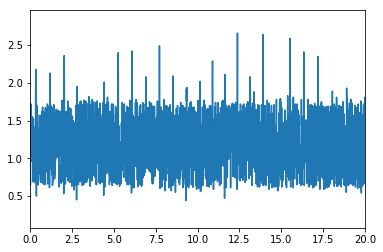

In [342]:
Números=["1","2","3","4","5","6","7","8","9","0","."]
ECG3=[]
for i in ECG2:
    i2=[]
    if (ECG2.index(i)%2)==0:
        for j in i:
            if j in Números:
                i2.append(j)
        Num=i2[0]+i2[1]+i2[2]+i2[3]+i2[4]+i2[5]+i2[6]+i2[7]
        ECG3.append(Num)    
ECG4=[]
for i in ECG3:
    b=float(i)
    ECG4.append(b)
tiempo=linspace(0,300,len(ECG4))
plot(tiempo,ECG4)
xlim(0,20)

In [345]:
ECG5=array(ECG4)

In [346]:
Transformada_Rápida_Fourier_1 = np.fft.rfft(ECG5)
Transformada_Rápida_Fourier_3 = scipy.fftpack.fft(ECG5) 

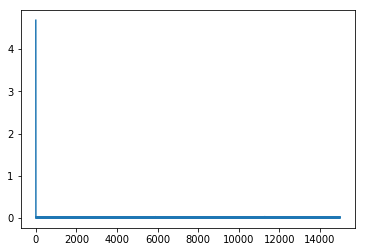

In [347]:
T1=2*(abs(Transformada_Rápida_Fourier_1)/len(Transformada_Rápida_Fourier_1))
plot(T1)

A continuación vamos a definir los tiempos en los que tomamos las muestras, es decir, los instantes de muestreo. 

In [348]:
Periodo_de_muestreo=300/30000
Instantes_de_muestreo=linspace(0,Periodo_de_muestreo,len(ECG4))
print(Instantes_de_muestreo)

[  0.00000000e+00   3.33355557e-07   6.66711114e-07 ...,   9.99933329e-03
   9.99966664e-03   1.00000000e-02]


Ahora vamos a analizar la señal de Electrocardiograma (ECG), y vamos a encontrar la máxima amplitud de la señal (Pico R), y en base a este valor vamos a buscar los demás máximos en la señal de ECG (el resto de picos R)

In [333]:
def Maximo_en_un_intervalo(lista):
    j=0
    posición=0
    for i in range(0,len(lista)): 
        if lista[i]>j:
            j=lista[i] 
        elif lista[i]<j:
            j=j
    return j
    

In [334]:
def Detector_de_máximo(Lista,Máximo,TOLERANCIA):
    Posiciones_maximos=[]
    for i in range(0,len(Lista)):
        if abs(Máximo-Lista[i])<TOLERANCIA:
            Posiciones_maximos.append(i)
        else:
            continue           
    return Posiciones_maximos

In [349]:
Amplitud_pico_R = Maximo_en_un_intervalo(ECG4)
Picos_R = Detector_de_máximo(ECG4,Amplitud_pico_R,0.4)
print(Picos_R)

[772, 1238, 1390, 1551, 2207, 2282, 2904, 3255, 3451, 3517, 3582, 3775, 3840, 3984, 4333, 4612, 4791, 5554, 5642, 5820, 6475, 6990, 7571, 7805, 7881, 8481, 8886, 9609, 9767, 10482, 10637, 10714, 10864, 10944, 11180, 11263, 11587, 11815, 12780, 12854, 13374, 13609, 14070, 14155, 14629, 14707, 14789, 15266, 15343, 15619, 15779, 16022, 16275, 16354, 16607, 16858, 17117, 17444, 18794, 19347, 19500, 19880, 20114, 20188, 20649, 20959, 21041, 21198, 21912, 21992, 22075, 22566, 22649, 22957, 23601, 23685, 24316, 24472, 25127, 25508, 25899, 26147, 26883, 27285, 29483, 29565, 29797, 29873, 29946]


Una vez que encontramos los tiempos en los que existen los picos R, hay que tomar en cuenta que en muchas ocasiones, esos tiempos corresponden a un mismo complejo QRS, así que si los tiempos están muy cercanos entre sí vamos a suponer que se trata de la misma señal, y procedemos a encontrar el máximo calculando el promedio de esos datos cercanos. Vamos a calcular los puntos cercanos y su promedio.

In [350]:
def tiempos_cercanos(C):
    LISTA=[]
    LISTA2=[]
    for i in C:
        a=C.index(i)
        for j in range(a+1,len(C)):
            lista=[]
            lista2=[]
            if abs(C[a]-C[j])<=1:
                lista.append(C[a])
                lista.append(C[j])
                LISTA.append(lista)
            else:
                continue
    return LISTA

In [351]:
def intervalos_R(lista):
    E=[]
    for i in range(0,len(lista)):
        if i < (len(lista)-1):
            B=lista[i+1]
            for j in lista[i]:
                if j in B:
                    C=B+lista[i]
                    C1=[]
                    for k in C: 
                        if k not in C1:
                            C1.append(k)
                    C1.sort()
                    if C1 not in E:
                        E.append(C1)
                    continue
                else: 
                    continue
        else: 
            continue 
    return E

In [352]:
def tiempos_solitarios(lista):
    LISTA=[]
    for i in range(0,len(lista)-1):
        if i == 0:
            if abs(lista[i]-lista[i+1])>2:
                LISTA.append(lista[i])
        if 0<i<len(lista):
            if abs(lista[i]-lista[i-1])>2 and abs(lista[i]-lista[i+1])>2:
                LISTA.append(lista[i])
    return LISTA

In [353]:
Tiempos_0=tiempos_cercanos(ECG1)
Tiempos_1=intervalos_R(Tiempos_0)
Tiempos_2=promedio_tiempo(Tiempos_1)
Tiempos_3=Relación_temporal(Tiempos_2,Instantes_de_muestreo)
Tiempos_4=tiempos_solitarios(ECG1)
Tiempos_5=Relación_temporal(Tiempos_4)

Tiempo_total=Tiempos_5.extend(Tiempos_3)
Tiempo_total.sort()

TypeError: object of type '_io.TextIOWrapper' has no len()

En estos tiempos encontramos los picos R, podemos encontrar en base a estos tiempos los intervalos RR, es decir, el intervalo de tiempo entre 2 picos R. 

In [202]:
def Intervalos_RRRRR(lista):
    INTERVALOSR=[]
    for i in range(0,len(lista)-1):
        tiempo=lista[i+1]-lista[i]
        INTERVALOSR.append(tiempo)
    plot(INTERVALOSR)
    title('Tacograma')
    ylim(-2,2)
    return INTERVALOSR

In [203]:
Intervalos_R_ECG=Intervalos_RRRRR(Tiempo_total)
plot(Intervalos_R_ECG)


NameError: name 'Tiempo_total' is not defined

## Recursos de consulta:

https://pythonhosted.org/pyserial/shortintro.html 

https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html#numpy.fft.rfft

https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft

Alicia Denis. (2015). Señales y sistemas. Fundamentos matemáticos. Buenos Aires, Argentina: UNSAM Edita. 

Variabilidad de la frecuencia cardíaca: Concepto, medidas y relación con aspectos clínicos, Gil Rodas,Archivo de medicina del deporte, volumen XXV, 2008. http://archivosdemedicinadeldeporte.com/articulos/upload/Variabilidad_41_123.pdf. Consultado el 13/Mayo/2019

## Apéndices:

El siguiente código nos ayudará a encontrar el valor máximo de amplitud que alcanza la señal de ECG. 

In [163]:
def Maximo_en_un_intervalo(lista):
    j=0
    posición=0
    for i in range(0,len(lista)): 
        if lista[i]>j:
            j=lista[i] 
        elif lista[i]<j:
            j=j
    return j
    

El valor máximo de la señal de ECG es 1, es decir, el pico R de mayor amplitud. Ahora, a lo largo de la señal vamos a buscar en qué tiempos encontramos un valor de amplitud similar. 

In [165]:
def Detector_de_máximo(Lista,Máximo,TOLERANCIA):
    Posiciones_maximos=[]
    for i in range(0,len(Lista)):
        if abs(Máximo-Lista[i])<TOLERANCIA:
            Posiciones_maximos.append(i)
        else:
            continue           
    return Posiciones_maximos

Los valores son los valores en los cuales podemos encontrar un máximo, pero no implica que correspondan a complejos PQR distintos, obviamente los valores que corresponden a complejos diferentes están separados en el intervalo temporal en más de 1 segundo. Por ello, vamos a distinguir los valores que corresponden a ciclos distintos, y a calcular un promedio entre los valores. 

In [197]:
def tiempos_cercanos(C):
    LISTA=[]
    LISTA2=[]
    for i in C:
        a=C.index(i)
        for j in range(a+1,len(C)):
            lista=[]
            lista2=[]
            if abs(C[a]-C[j])<=1:
                lista.append(C[a])
                lista.append(C[j])
                LISTA.append(lista)
            else:
                continue
    return LISTA

In [170]:
B=tiempos_distantes(D)
print(B)

[[0, 1], [1, 2], [118, 119], [119, 120]]


In [178]:
C1=intervalos_R(B)
print(C1)

[[0, 1, 2], [118, 119, 120]]


In [179]:
v=promedio_tiempo(C1)
print(v)
Relación_temporal(v,tiempo)

[0.0020345879959308239, 0.24211597151576805]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [180]:
lista=tiempos_distantes(C)
lista2=tiempos_solitarios(C)
lista4=Relación_temporal(lista2,tiempo)
lista3=promedio_tiempo(lista)
lista3.extend(lista4)
print(lista3)
lista3.sort()
print(lista3)


[0.001017293997965412, 0.25127161749745675, 0.50152594099694814, 0.75178026449643953, 1.0020345879959307, 1.2522889114954221, 1.5025432349949135, 1.7527975584944047, 0.2115971515768057, 0.46185147507629704, 0.71210579857578837, 0.96236012207527977, 1.2126144455747712, 1.4628687690742623, 1.7131230925737537]
[0.001017293997965412, 0.2115971515768057, 0.25127161749745675, 0.46185147507629704, 0.50152594099694814, 0.71210579857578837, 0.75178026449643953, 0.96236012207527977, 1.0020345879959307, 1.2126144455747712, 1.2522889114954221, 1.4628687690742623, 1.5025432349949135, 1.7131230925737537, 1.7527975584944047]


In [196]:
def Intervalos_RRRRR(lista):
    INTERVALOSR=[]
    for i in range(0,len(lista)-1):
        tiempo=lista[i+1]-lista[i]
        INTERVALOSR.append(tiempo)
    plot(INTERVALOSR)
    title('Tacograma')
    ylim(-2,2)
    return INTERVALOSR

[0.21057985757884029,
 0.039674465920651047,
 0.21057985757884029,
 0.039674465920651103,
 0.21057985757884023,
 0.039674465920651159,
 0.21057985757884023,
 0.039674465920650936,
 0.21057985757884046,
 0.039674465920650936,
 0.21057985757884023,
 0.039674465920651159,
 0.21057985757884023,
 0.039674465920650936]

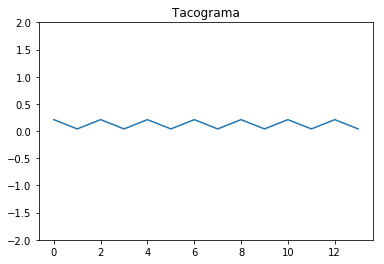

In [182]:
Intervalos_RRRRR(lista3)

In [159]:
def intervalos_R(lista):
    E=[]
    for i in range(0,len(lista)):
        if i < (len(lista)-1):
            B=lista[i+1]
            for j in lista[i]:
                if j in B:
                    C=B+lista[i]
                    C1=[]
                    for k in C: 
                        if k not in C1:
                            C1.append(k)
                    C1.sort()
                    if C1 not in E:
                        E.append(C1)
                    continue
                else: 
                    continue
        else: 
            continue 
    return E

In [165]:
R=[0,1,2,3,50,120,121,122,123,124,136,167,180,190,191,210,211,212,213]

In [204]:
def tiempos_solitarios(lista):
    LISTA=[]
    for i in range(0,len(lista)-1):
        if i == 0:
            if abs(lista[i]-lista[i+1])>2:
                LISTA.append(lista[i])
        if 0<i<len(lista):
            if abs(lista[i]-lista[i-1])>2 and abs(lista[i]-lista[i+1])>2:
                LISTA.append(lista[i])
    return LISTA

In [202]:
tiempos_solitarios(R)

[50, 136, 167, 180]

In [167]:
R1=tiempos_distantes(R)
R2=intervalos_R(R1)
R3=intervalos_R(R2)
R4=intervalos_R(R3)
print(R4)

[[120, 121, 122, 123, 124]]


In [143]:
def Relación_temporal(lista1,lista2):
    Lista3=[]
    for i in lista1:
        Lista3.append(lista2[i])
    return Lista3

In [123]:
Relación_temporal(C,tiempo)

[0.97142857142857153,
 0.97959183673469397,
 0.96326530612244909,
 0.97959183673469397]

In [200]:
def promedio_tiempo(LISTA):
    T=[]
    for i in LISTA:
        t=0
        for j in i:
            t=t+j
        t=t/len(i)
        T.append(t)
    return T

In [177]:
promedio_tiempo(A)

NameError: name 'A' is not defined

In [ ]:
def Intervalos_RRRRR(lista):
    
    

In [200]:
ECG2=np.array([1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01,1.195299848914146423e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,2.500000000000000000e-01,2.042139321565628052e-01,1.689627170562744141e-01,1.474878489971160889e-01,1.304700225591659546e-01,1.243922188878059387e-01,1.175040528178215027e-01,1.166936755180358887e-01,1.158833056688308716e-01,1.187196075916290283e-01,1.154781207442283630e-01,1.138573735952377319e-01,1.195299848914146423e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.207455396652221680e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.264181584119796753e-01,1.316855698823928833e-01,1.418152302503585815e-01,1.393841207027435303e-01,1.450567245483398438e-01,1.434359848499298096e-01,1.410048604011535645e-01,1.405996829271316528e-01,1.381685584783554077e-01,1.369529962539672852e-01,1.320907622575759888e-01,1.284440904855728149e-01,1.284440904855728149e-01,1.280388981103897095e-01,1.252025961875915527e-01,1.223662868142127991e-01,1.170988678932189941e-01,1.126418188214302063e-01,1.130470037460327148e-01,1.276337057352066040e-01,1.653160452842712402e-01,1.794975697994232178e-01,1.612641811370849609e-01,1.766612678766250610e-01,1.827390640974044800e-01,1.746353358030319214e-01,1.515397131443023682e-01,1.478930264711380005e-01,1.349270641803741455e-01,1.227714717388153076e-01,1.069692075252532959e-01,9.805510193109512329e-02,9.440843015909194946e-02,8.914100378751754761e-02,8.914100378751754761e-02,8.873581886291503906e-02,9.076175093650817871e-02,8.589951694011688232e-02,8.589951694011688232e-02,8.914100378751754761e-02,8.427876979112625122e-02,5.794165283441543579e-02,0.000000000000000000e+00,1.162884905934333801e-01,3.095623850822448730e-01,8.342787623405456543e-01,9.643436074256896973e-01,5.615883469581604004e-01,8.144246041774749756e-02,3.241490945219993591e-02,1.126418188214302063e-01,1.523500829935073853e-01,1.357374340295791626e-01,1.247974038124084473e-01,1.235818490386009216e-01,1.235818490386009216e-01,1.158833056688308716e-01,1.154781207442283630e-01,1.166936755180358887e-01,1.247974038124084473e-01,1.280388981103897095e-01,1.300648301839828491e-01,1.268233358860015869e-01,1.296596378087997437e-01,1.361426264047622681e-01,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01,1.195299848914146423e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,2.500000000000000000e-01,2.042139321565628052e-01,1.689627170562744141e-01,1.474878489971160889e-01,1.304700225591659546e-01,1.243922188878059387e-01,1.175040528178215027e-01,1.166936755180358887e-01,1.158833056688308716e-01,1.187196075916290283e-01,1.154781207442283630e-01,1.138573735952377319e-01,1.195299848914146423e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.207455396652221680e-01,1.166936755180358887e-01,1.227714717388153076e-01,1.264181584119796753e-01,1.316855698823928833e-01,1.418152302503585815e-01,1.393841207027435303e-01,1.450567245483398438e-01,1.434359848499298096e-01,1.410048604011535645e-01,1.405996829271316528e-01,1.381685584783554077e-01,1.369529962539672852e-01,1.320907622575759888e-01,1.284440904855728149e-01,1.284440904855728149e-01,1.280388981103897095e-01,1.252025961875915527e-01,1.223662868142127991e-01,1.170988678932189941e-01,1.126418188214302063e-01,1.130470037460327148e-01,1.276337057352066040e-01,1.653160452842712402e-01,1.794975697994232178e-01,1.612641811370849609e-01,1.766612678766250610e-01,1.827390640974044800e-01,1.746353358030319214e-01,1.515397131443023682e-01,1.478930264711380005e-01,1.349270641803741455e-01,1.227714717388153076e-01,1.069692075252532959e-01,9.805510193109512329e-02,9.440843015909194946e-02,8.914100378751754761e-02,8.914100378751754761e-02,8.873581886291503906e-02,9.076175093650817871e-02,8.589951694011688232e-02,8.589951694011688232e-02,8.914100378751754761e-02,8.427876979112625122e-02,5.794165283441543579e-02,0.000000000000000000e+00,1.162884905934333801e-01,3.095623850822448730e-01,8.342787623405456543e-01,9.643436074256896973e-01,5.615883469581604004e-01,8.144246041774749756e-02,3.241490945219993591e-02,1.126418188214302063e-01,1.523500829935073853e-01,1.357374340295791626e-01,1.247974038124084473e-01,1.235818490386009216e-01,1.235818490386009216e-01,1.158833056688308716e-01,1.154781207442283630e-01,1.166936755180358887e-01,1.247974038124084473e-01,1.280388981103897095e-01,1.300648301839828491e-01,1.268233358860015869e-01,1.296596378087997437e-01,1.361426264047622681e-01])

In [201]:
Transformada_Rápida_Fourier_1 = np.fft.rfft(ECG1)

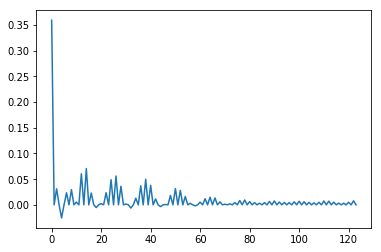

In [198]:
plot(real(Transformada_Rápida_Fourier_1)/len(Transformada_Rápida_Fourier_1))

In [63]:
Datos=[]
import csv
with open('ptbdb_abnormal.csv') as File:
    reader=csv.reader(File, delimiter=',',quotechar=',',
                     quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        Datos.append(row)

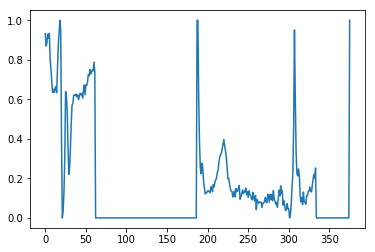

In [64]:
Datos[0].extend(Datos[1])
D11=[]
for i in Datos[0]:
    D11.append(float(i))
plot(D11)


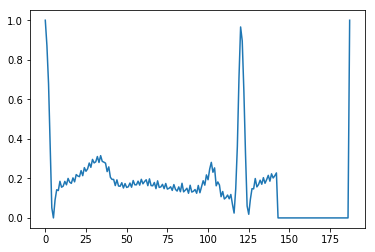

In [43]:
D=[]
for i in Datos[7]:
    a=float(i)
    D.append(a)
plot(D)

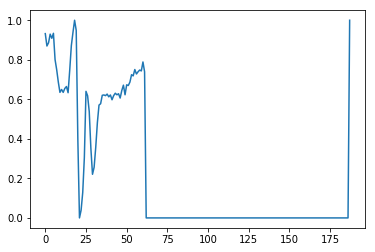

In [23]:
plot(D)

In [66]:
Datos2=[]
import csv
with open('ptbdb_normal.csv') as File:
    reader=csv.reader(File, delimiter=',',quotechar=',',
                     quoting=csv.QUOTE_MINIMAL)
    for row in reader:
        Datos2.append(row)

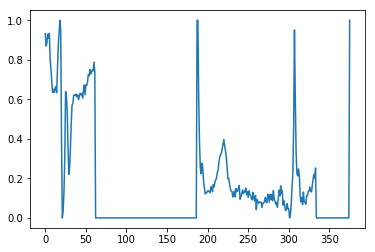

In [72]:
D111=[]
for i in Datos[1]:
    D111.append(float(i))
plot(D11)

Programa para calcular la transformada de fourier a la base de datos:

In [99]:
import random
import numpy as np
import pylab as plt
import os
import scipy
from decimal import *
import numpy

In [108]:
arange(111)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110])

In [109]:
type(B)

decimal.Decimal

In [ ]:
#Primero tenemos nuestros datos. Considerando que ya hicimos el proceso de importar. 
#ECG1=np.array()
#Número_de_muestras=len(ECG1)
#Intervalo de muestreo=0.001
#Tiempototaldemuestreo=Numerodemuestras*Intervalodemuestreo=linspace(0,int(Numerodemuestras*Intervalodemuestreo),Intervalodemuestreo)
#Tiempomaximo=Numerodemuestras*intervalodemuestreo



